# **Multiple Linear Regression**


In [ ]:
if (!require(MASS)) install.packages('MASS')
if (!require(dplyr)) install.packages('dplyr')
if (!require(tidyr)) install.packages('tidyr')
if (!require(ggplot2)) install.packages('ggplot2')
if (!require(lubridate)) install.packages('lubridate')
if (!require(splines)) install.packages('splines')
if (!require(mgcv)) install.packages('mgcv')

In [ ]:
library(MASS)
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(splines)
library(mgcv)

# A reminder : the simple linear regression

We consider a data set that provides the number of years a worker was exposed to cotton dust (*Exposure*) versus a measure of lung capacity (*PEFR* or *Peak Expiratory Flow Rate*).

In [ ]:
# Load the data
lung <- read.csv(file.path('sample_data', 'LungDisease.csv'), stringsAsFactors = TRUE)
head(lung)
dim(lung)

,PEFR,Exposure
,<int>,<int>
1,390,0
2,410,0
3,430,0
4,460,0
5,420,1
6,280,2


[1] 122   2

In [ ]:
head(as.data.frame(lung[,'Exposure']))

,"lung[, ""Exposure""]"
,<int>
1,0
2,0
3,0
4,0
5,1
6,2


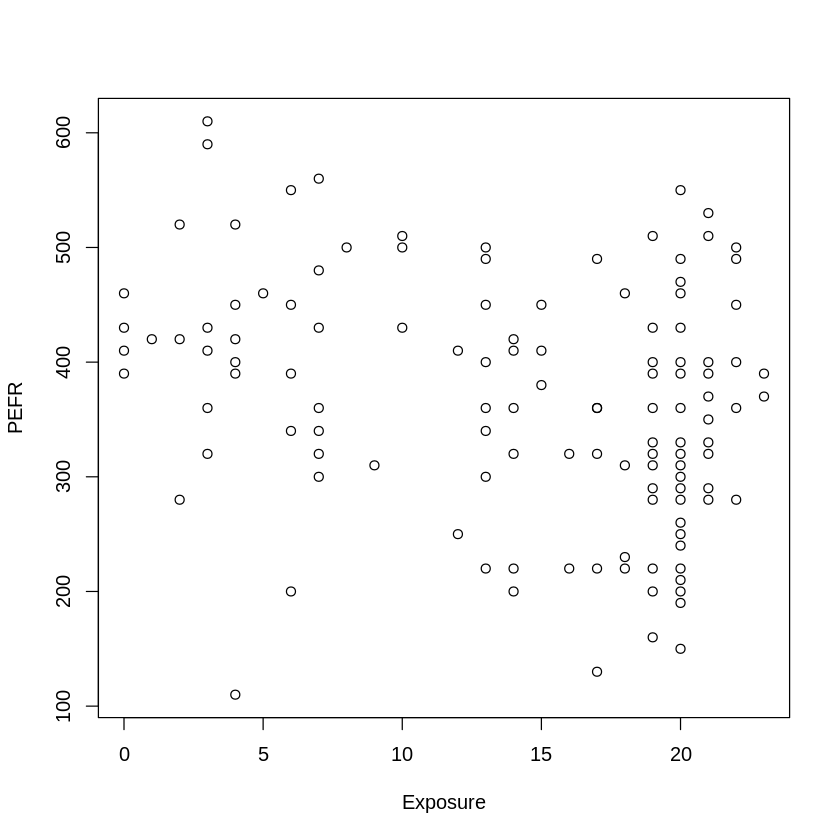

In [ ]:
# Let us visualize the covariation of the two variables using a scatterplot
plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")

# NB:
# In this example, it is hard to have a clear conclusion on the strenght
# of the relationship

In [ ]:
# We can fit a linear regression model using 'lm'
model <- lm(PEFR ~ Exposure, data = lung)
model

# NB:
# We predit the PEFR (outcome, dependant variable) with the Exposure variable
# (feature, independant variable)


Call:
lm(formula = PEFR ~ Exposure, data = lung)

Coefficients:
(Intercept)     Exposure  
    424.583       -4.185  


In [ ]:
model$coefficients

(Intercept)    Exposure 
 424.582807   -4.184576

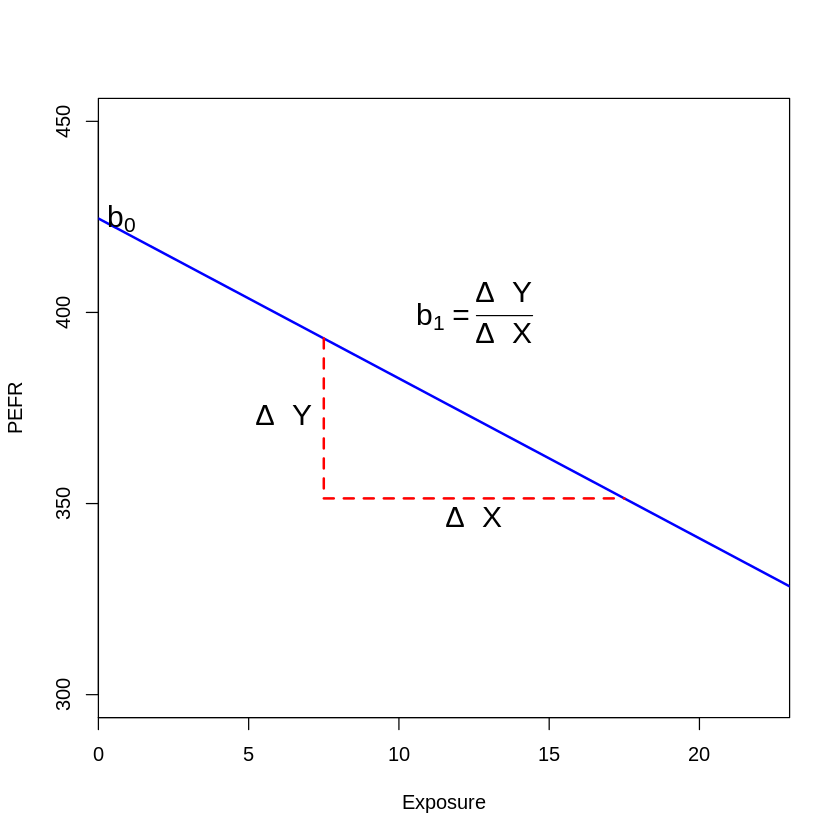

In [ ]:
# We can plot the fitted line
plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR", ylim=c(300,450), type="n", xaxs="i")
abline(a=model$coefficients[1], b=model$coefficients[2], col="blue", lwd=2)
text(x=.3, y=model$coefficients[1], labels=expression("b"[0]),  adj=0, cex=1.5)
x <- c(7.5, 17.5)
y <- predict(model, newdata=data.frame(Exposure=x))
segments(x[1], y[2], x[2], y[2] , col="red", lwd=2, lty=2)
segments(x[1], y[1], x[1], y[2] , col="red", lwd=2, lty=2)
text(x[1], mean(y), labels=expression(Delta~Y), pos=2, cex=1.5)
text(mean(x), y[2], labels=expression(Delta~X), pos=1, cex=1.5)
text(mean(x), 400, labels=expression(b[1] == frac(Delta ~ Y, Delta ~ X)), cex=1.5)

# NB:
# Intercept: bo, corresponds to a PEFR for soemone with zero year of Exposure
# Slope: b1, for each additional year, the PEFR is reduced of -4.185

In [ ]:
# We can obtain the fitted values and residuals using 
# 'predict' and 'residuals'
fitted <- predict(model)
print('# -- Fitted values')
head(fitted, n = 50)

resid <- residuals(model)
print('# -- Residuals')
head(resid)

[1] "# -- Fitted values"


1        2        3        4        5        6        7        8 
424.5828 424.5828 424.5828 424.5828 420.3982 416.2137 416.2137 416.2137 
       9       10       11       12       13       14       15       16 
412.0291 412.0291 412.0291 412.0291 412.0291 412.0291 407.8445 407.8445 
      17       18       19       20       21       22       23       24 
407.8445 407.8445 407.8445 407.8445 403.6599 399.4753 399.4753 399.4753 
      25       26       27       28       29       30       31       32 
399.4753 399.4753 395.2908 395.2908 395.2908 395.2908 395.2908 395.2908 
      33       34       35       36       37       38       39       40 
395.2908 391.1062 386.9216 382.7370 382.7370 382.7370 374.3679 374.3679 
      41       42       43       44       45       46       47       48 
370.1833 370.1833 370.1833 370.1833 370.1833 370.1833 370.1833 370.1833 
      49       50 
365.9987 365.9987

[1] "# -- Residuals"


1            2            3            4            5            6 
 -34.5828066  -14.5828066    5.4171934   35.4171934   -0.3982301 -136.2136536

# Multiple Linear Regression

We are interested in estimating the value of houses. County assessors must estimate the value of a house for the purposes of assessing taxes. The multiple linear regression enables us to predict the sales price from the other variables.

In [ ]:
# Load the data
house <- read.csv(file.path('sample_data', 'house_sales.csv'), sep='\t')
head(house)
dim(house)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,⋯,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.9308364,300805,2,9373,⋯,3.00,6,7,1991,0,0,70000,229000,98002,FALSE
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.9292279,1076162,1,20156,⋯,3.75,4,10,2005,0,0,203000,590000,98166,TRUE
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.9779412,761805,1,26036,⋯,1.75,4,8,1947,0,0,183000,275000,98166,FALSE
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.9613971,442065,1,8618,⋯,3.75,5,7,1966,0,0,104000,229000,98168,FALSE
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.8079044,297065,1,8620,⋯,1.75,4,7,1948,0,0,104000,205000,98168,FALSE
6,2009-03-30,349900,3600090,Townhouse,2009-03-01,369800,0.8497243,411781,1,1012,⋯,1.50,2,8,2008,0,0,170000,207000,98144,TRUE


[1] 22687    22

In [ ]:
# Amont the available features, we pick 'a priori' some interesting features
print(head(house[, c('AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
                      'Bedrooms', 'BldgGrade')]))

  AdjSalePrice SqFtTotLiving SqFtLot Bathrooms Bedrooms BldgGrade
1       300805          2400    9373      3.00        6         7
2      1076162          3764   20156      3.75        4        10
3       761805          2060   26036      1.75        4         8
4       442065          3200    8618      3.75        5         7
5       297065          1720    8620      1.75        4         7
6       411781           930    1012      1.50        2         8


In [ ]:
# 'lm' handles the multiple linear regression
house_lm <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade,  
               data = house, na.action = na.omit)
house_lm


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house, na.action = na.omit)

Coefficients:
  (Intercept)  SqFtTotLiving        SqFtLot      Bathrooms       Bedrooms  
   -5.219e+05      2.288e+02     -6.047e-02     -1.944e+04     -4.777e+04  
    BldgGrade  
    1.061e+05  


In [ ]:
as.data.frame(house_lm$coefficients)

,house_lm$coefficients
,<dbl>
(Intercept),-5.218714e+05
SqFtTotLiving,2.288306e+02
SqFtLot,-6.046682e-02
Bathrooms,-1.944284e+04
Bedrooms,-4.776996e+04
BldgGrade,1.061070e+05


# Assessing the model

$\underline{Root Mean Squared Error}$ :
\begin{equation}
RMSE = \sqrt{\frac{\sum_{i=1}^n(y_i-\bar{y}_i)^2}{n}}
\end{equation}

$\underline{Residual Standard Error}$ :
\begin{equation}
RSE = \sqrt{\frac{\sum_{i=1}^n(y_i-\bar{y}_i)^2}{n-p-1}}
\end{equation}

$\underline{R^2}$ :
\begin{equation}
R^2 = \frac{E_{xplain}SS}{T_{otal}SS} = 1 - \frac{R_{esidual}SS}{T_{otal}SS}
\end{equation}

In [ ]:
# We can use directly the summary of the fitted model to get these metrics
summary(house_lm)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-1199479  -118908   -20977    87435  9473035 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.219e+05  1.565e+04 -33.342  < 2e-16 ***
SqFtTotLiving  2.288e+02  3.899e+00  58.694  < 2e-16 ***
SqFtLot       -6.047e-02  6.118e-02  -0.988    0.323    
Bathrooms     -1.944e+04  3.625e+03  -5.363 8.27e-08 ***
Bedrooms      -4.777e+04  2.490e+03 -19.187  < 2e-16 ***
BldgGrade      1.061e+05  2.396e+03  44.277  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261300 on 22681 degrees of freedom
Multiple R-squared:  0.5406,	Adjusted R-squared:  0.5405 
F-statistic:  5338 on 5 and 22681 DF,  p-value: < 2.2e-16


# Model selection and Stepwise Regression



We can use additional variables to predict the outcome (eg. *basement size*, *year built*).

In [ ]:
# Let us add predictors by just modifiying the 'lm' formula
house_full <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
                   Bedrooms + BldgGrade + PropertyType + NbrLivingUnits + 
                   SqFtFinBasement + YrBuilt + YrRenovated + NewConstruction,
                 data = house, na.action = na.omit)
summary(house_full)

# NB: 
# - previous adjusted R2 = 0.5405
# - new adjusted R2 = 0.5944
# improvement (^_^)b


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade + PropertyType + NbrLivingUnits + SqFtFinBasement + 
    YrBuilt + YrRenovated + NewConstruction, data = house, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-1324265  -104593    -7544    81465  9285969 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                6.182e+06  1.549e+05  39.902  < 2e-16 ***
SqFtTotLiving              1.986e+02  4.234e+00  46.920  < 2e-16 ***
SqFtLot                    7.707e-02  5.795e-02   1.330 0.183551    
Bathrooms                  4.286e+04  3.808e+03  11.255  < 2e-16 ***
Bedrooms                  -5.187e+04  2.397e+03 -21.638  < 2e-16 ***
BldgGrade                  1.373e+05  2.441e+03  56.228  < 2e-16 ***
PropertyTypeSingle Family  2.997e+04  2.609e+04   1.149 0.250599    
PropertyTypeTownhouse      9.286e+04  2.701e+04   3.438 0.000586 ***
NbrLivingUnits             5

In [ ]:
# We can use 'stepAIC' to capture the interesting features
step_lm <- stepAIC(house_full, direction="both")
step_lm

# NB:
# We finally get a model for which several variables were dropped:
# SqFtLot, NbrLivingUnits, YrRenovated, NewConstruction

Start:  AIC=563145.4
AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + 
    BldgGrade + PropertyType + NbrLivingUnits + SqFtFinBasement + 
    YrBuilt + YrRenovated + NewConstruction

                  Df  Sum of Sq        RSS    AIC
- NbrLivingUnits   1 6.4007e+09 1.3662e+15 563144
- NewConstruction  1 1.0592e+10 1.3662e+15 563144
- YrRenovated      1 2.5069e+10 1.3662e+15 563144
- SqFtLot          1 1.0657e+11 1.3663e+15 563145
<none>                          1.3662e+15 563145
- SqFtFinBasement  1 1.4030e+11 1.3663e+15 563146
- PropertyType     2 4.4207e+12 1.3706e+15 563215
- Bathrooms        1 7.6325e+12 1.3738e+15 563270
- Bedrooms         1 2.8212e+13 1.3944e+15 563607
- YrBuilt          1 1.2906e+14 1.4952e+15 565191
- SqFtTotLiving    1 1.3264e+14 1.4988e+15 565246
- BldgGrade        1 1.9050e+14 1.5567e+15 566105

Step:  AIC=563143.6
AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + 
    BldgGrade + PropertyType + SqFtFinBasement + YrBuilt + YrRenov


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + Bathrooms + Bedrooms + 
    BldgGrade + PropertyType + SqFtFinBasement + YrBuilt, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
                6.179e+06                  1.993e+02  
                Bathrooms                   Bedrooms  
                4.240e+04                 -5.195e+04  
                BldgGrade  PropertyTypeSingle Family  
                1.372e+05                  2.291e+04  
    PropertyTypeTownhouse            SqFtFinBasement  
                8.448e+04                  7.047e+00  
                  YrBuilt  
               -3.565e+03  


In [ ]:
stepAIC_model <- lm(formula = AdjSalePrice ~ SqFtTotLiving + Bathrooms + Bedrooms + 
    BldgGrade + PropertyType + SqFtFinBasement + YrBuilt, data = house, 
    na.action = na.omit)

summary(stepAIC_model)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + Bathrooms + Bedrooms + 
    BldgGrade + PropertyType + SqFtFinBasement + YrBuilt, data = house, 
    na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-1324009  -104552    -7630    81563  9293656 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                6.179e+06  1.355e+05  45.599  < 2e-16 ***
SqFtTotLiving              1.993e+02  4.172e+00  47.770  < 2e-16 ***
Bathrooms                  4.240e+04  3.748e+03  11.313  < 2e-16 ***
Bedrooms                  -5.195e+04  2.386e+03 -21.770  < 2e-16 ***
BldgGrade                  1.372e+05  2.428e+03  56.501  < 2e-16 ***
PropertyTypeSingle Family  2.291e+04  1.580e+04   1.450    0.147    
PropertyTypeTownhouse      8.448e+04  1.760e+04   4.801 1.59e-06 ***
SqFtFinBasement            7.047e+00  4.604e+00   1.531    0.126    
YrBuilt                   -3.565e+03  7.127e+01 -50.029  < 2e-16 ***
---
Signif. codes:

In [ ]:
dim(house)

[1] 22687    22

# Weighted regression

Some records may have more *weight* than others with regards to the outcome. For
instance, older records may be considered are less reliable. We can use weight for the regression to take this into account.

In [ ]:
# Let us consider 'DocumentDate' to determine the older sales.
# We can compute the weight as the number of years since 2005
house$Year = year(house$DocumentDate)
house$Weight = house$Year - 2005

In [ ]:
# We can fit again the model
house_wt <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
                 Bedrooms + BldgGrade,
               data=house, weight=Weight, na.action=na.omit)
round(cbind(house_lm=house_lm$coefficients, 
            house_wt=house_wt$coefficients), digits=3)

# NB:
# The coefficient are slightly different.

,house_lm,house_wt
(Intercept),-521871.368,-584189.329
SqFtTotLiving,228.831,245.024
SqFtLot,-0.060,-0.292
Bathrooms,-19442.840,-26085.970
Bedrooms,-47769.955,-53608.876
BldgGrade,106106.963,115242.435


# Factor variables in regression

The *factor* variables are the *categorical* variables. They take a limited number of discrete values. Regression requires *numerical* inputs. So, we should convert the factor variables into *dummy* variables that are a set of *binary* variables (ie., yes/no).

# Dummy variable representation

In the data set *house_sales*, there is one factor variable, *property type*, that can take three possible values: Multiplex, Single Family and Townhouse. We need to convert it to a set of binary variables. To do this, we can create a binary variable for each category.

In [ ]:
# Let us see few values of "property type"
head(as.data.frame(house[, 'PropertyType']), n = 7)

,"house[, ""PropertyType""]"
,<chr>
1,Multiplex
2,Single Family
3,Single Family
4,Single Family
5,Single Family
6,Townhouse
7,Single Family


In [ ]:
# We can convert this factor to a set of binary variables with 'model.matrix'
prop_type_dummies <- model.matrix(~PropertyType -1, data=house)
head(prop_type_dummies, n = 7)

# NB:
# With '-1', you remove the intercept!

,PropertyTypeMultiplex,PropertyTypeSingle Family,PropertyTypeTownhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,1,0


**Caution**: <br>
In the regression setting, a factor variable with *P* dsitinct levels is usually represented by a matrix with only $P-1$ columns. This is because a regression model typically includes an **intercept** term. With an intercept, once you have defined the values for $P-1$ binaries, the value for the $P^{th}$ is known and could be considered redundant.<br><br>

Adidng the $P^{th}$ column will cause a **multicollinearity** error. Perfect multicollinearity occurs when one predictor variable can be expressed as **linear combination** of others. Hence, **multicollinearity** occurs when:
- A variable is included multiple times by error
- $P$ dummies, instead of $P-1$ dummies, are created from a factor variable
- Two variables are nearly perfectly correlated with one another<br><br>

In the case of nonperfect multicollinearity, the software may obtain a solution, but the results may be unstable.

In [ ]:
# Dummification is implicitly done in R...
# The first level is taken as reference.
lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
     Bedrooms +  BldgGrade + PropertyType, data=house)

# NB: 
# The first level of the factor variable is taken as reference.
# Hence, there is no coefficient of Multiplex since it is implicitly defined 
# when PropertyTypeSingle Family == 0 and PropertyTypeTownhouse == 0
#
# The coefficients are interpreted as relative to Multiplex. So, a home that is
# Single Family is worth almost $85,000 less, and a home that is Townhouse is
# worth over $115,000 less.


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade + PropertyType, data = house)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -4.468e+05                  2.234e+02  
                  SqFtLot                  Bathrooms  
               -7.037e-02                 -1.598e+04  
                 Bedrooms                  BldgGrade  
               -5.089e+04                  1.094e+05  
PropertyTypeSingle Family      PropertyTypeTownhouse  
               -8.468e+04                 -1.151e+05  


# Interpreting the regression equation

We want to understand the relationship between the predictors and the outcome. 

## Correlated predictors

We often cope with predictors that are correlated to some extend. 

In [ ]:
# Let us have a look at the coefficients of the regression
as.data.frame(step_lm$coefficients)

# NB:
# Coef. 'Bedrooms': It is negative, meaning that adding a bedroom
# decreases the price...
#
# Consider two houses of the same size; it is reasonnable to 
# that a home with more but smaller bedrooms is less
# desirable!

,step_lm$coefficients
,<dbl>
(Intercept),6.178645e+06
SqFtTotLiving,1.992776e+02
Bathrooms,4.239616e+04
Bedrooms,-5.194738e+04
BldgGrade,1.371596e+05
PropertyTypeSingle Family,2.291206e+04
PropertyTypeTownhouse,8.447916e+04
SqFtFinBasement,7.046975e+00
YrBuilt,-3.565425e+03


In [ ]:
# In fact, predictors 'Bedrooms', 'house size' and 'Bathrooms' are correlated
# Let us try another regression without these predictors
update(step_lm, . ~ . -SqFtTotLiving - SqFtFinBasement - Bathrooms)

# NB:
# 'update' can be used to easily add or remove predictors.
# Have a look at the 'Bedrooms' coefficient.


Call:
lm(formula = AdjSalePrice ~ Bedrooms + BldgGrade + PropertyType + 
    YrBuilt, data = house, na.action = na.omit)

Coefficients:
              (Intercept)                   Bedrooms  
                  4913973                      27151  
                BldgGrade  PropertyTypeSingle Family  
                   248998                     -19898  
    PropertyTypeTownhouse                    YrBuilt  
                   -47355                      -3212  


## Cofounding variables

It is an *omission* issue: an important variable is not included in the regression equation. In our example, we miss a variable that would indicate
the location, which is very important when predicting a house price.

In [ ]:
# Let us create the ZipGroup predictor from the ZipCode variable
# ZipCode has 80 different values. We will consolidate this variable
# into 5 categories.

table(house$ZipCode)


98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019 98022 
  358   180   241   293   133   460   112   291    56   163    85   242   188 
98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038 98039 98040 
  455    31   366   252   475   263   308   121   517   575   788    47   244 
98042 98043 98045 98047 98050 98051 98052 98053 98055 98056 98057 98058 98059 
  641     1   222    48     7    32   614   499   332   402     4   420   513 
98065 98068 98070 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 
  430     1    89   245   502   388   204   289   106   671   313   361   296 
98108 98109 98112 98113 98115 98116 98117 98118 98119 98122 98125 98126 98133 
  155   149   357     1   620   364   619   492   260   380   409   473   465 
98136 98144 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199 98224 
  310   332   287    40   358   193   332   216   266   101   225   393     3 
98288 98354 
    4     9 

In [ ]:
zip_groups <- house %>%
  mutate(resid = residuals(house_lm)) %>%
  group_by(ZipCode) %>%
  summarize(med_resid = median(resid),
            cnt = n()) %>%
  # sort the zip codes by the median residual
  arrange(med_resid) %>%
  mutate(cum_cnt = cumsum(cnt),
         ZipGroup = factor(ntile(cum_cnt, 5)))
house <- house %>%
  left_join(select(zip_groups, ZipCode, ZipGroup), by='ZipCode')

In [ ]:
table(zip_groups[c('ZipGroup')])

ZipGroup
 1  2  3  4  5 
16 16 16 16 16 

In [ ]:
# Now, we add 'ZipGroup' to our multiple regression model
lm(AdjSalePrice ~  SqFtTotLiving + SqFtLot + 
     Bathrooms + Bedrooms + 
     BldgGrade + PropertyType + ZipGroup,
   data=house, na.action=na.omit)

# NB:
# The less expensive area has the ZipCode 1.
# The most expensive area has the ZipCode 5.


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade + PropertyType + ZipGroup, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -6.666e+05                  2.106e+02  
                  SqFtLot                  Bathrooms  
                4.550e-01                  5.928e+03  
                 Bedrooms                  BldgGrade  
               -4.168e+04                  9.854e+04  
PropertyTypeSingle Family      PropertyTypeTownhouse  
                1.932e+04                 -7.820e+04  
                ZipGroup2                  ZipGroup3  
                5.332e+04                  1.163e+05  
                ZipGroup4                  ZipGroup5  
                1.784e+05                  3.384e+05  


**Caution** : *ZipGroup* is an important variable. A home with the most expensive ZipCode is estimated to have a higher sales price by almost
$340,000$ dollars. The coefficients are of *SqFtLot* and *Bathrooms* are
now positive and adding a bathroom increases the sale price by $5,928$ dollars.

The coef. of *Bedrooms* is still negative. Why? For homes of the same livable area and number of bathrooms, having more and therefore smaller bedrooms is associated with less valuable homes.

## Interactions

When doing a multiple regression, we usually assume that the relationship between a predictor variable and the response is independent of the other predictor variables. This is often not the case...

*Example*:<br>
There is an interaction between the livable area and the district. Indeed, a big house built in a low-rend district is not going to retain the same value as a big house built in an expensive area.
<br>
<br>

Let us include this interaction!

In [ ]:
# You can us the operato '*' to include an interaction
lm(AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + 
     Bathrooms + Bedrooms + 
     BldgGrade + PropertyType,
   data=house, na.action=na.omit)

# NB:
# We have now four new terms: 
# - SqFtTotLiving:ZipGroup2
# - SqFtTotLiving:ZipGroup3
# - SqFtTotLiving:ZipGroup4
# - SqFtTotLiving:ZipGroup5


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving * ZipGroup + SqFtLot + 
    Bathrooms + Bedrooms + BldgGrade + PropertyType, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -4.853e+05                  1.148e+02  
                ZipGroup2                  ZipGroup3  
               -1.113e+04                  2.032e+04  
                ZipGroup4                  ZipGroup5  
                2.050e+04                 -1.499e+05  
                  SqFtLot                  Bathrooms  
                6.869e-01                 -3.619e+03  
                 Bedrooms                  BldgGrade  
               -4.180e+04                  1.047e+05  
PropertyTypeSingle Family      PropertyTypeTownhouse  
                1.357e+04                 -5.884e+04  
  SqFtTotLiving:ZipGroup2    SqFtTotLiving:ZipGroup3  
                3.260e+01                  4.178e+01  
  SqFtTotLiving:ZipGroup4    SqFtTotLiving:ZipGro

**Caution**
- For a house in the lowest ZipGroup, the slope is the same as the slope for the main effect *SqFtTotLiving*, because R uses reference coding for factor variables
- For a home in the highest ZipGroup, the slope is the sum of the main effect plus *SqFtTotLiving:ZipGroup5* or $\$115 + \$227=\$342$ per square foot.
- $⇒$ adding a square foot in the most expensive zip code group boosts the predicted sale price by a factor of almost three, compare to the average boost from adding a square foot.

# Regression diagnostics


## Outliers

An outlier is an extreme value, ie. a value that is distant from most of the other observations. You can detect them using the *standardized residual*, which is the residual divided by the standard error of the residuals.
<br><br>

**Standardized residuals** = the number of standard errors away from the regression line.

In [ ]:
house_98105 <- house[house$ZipCode == 98105,]
lm_98105 <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
                 Bedrooms + BldgGrade, data=house_98105)

In [ ]:
summary(lm_98105)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house_98105)

Residuals:
    Min      1Q  Median      3Q     Max 
-757754  -91807   -9668   77586  953911 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -772549.86   98277.27  -7.861 6.51e-14 ***
SqFtTotLiving     209.60      24.41   8.587 4.54e-16 ***
SqFtLot            38.93       5.33   7.305 2.41e-12 ***
Bathrooms        2282.26   19983.57   0.114   0.9091    
Bedrooms       -26320.27   12881.09  -2.043   0.0419 *  
BldgGrade      130000.10   15234.12   8.533 6.63e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178500 on 307 degrees of freedom
Multiple R-squared:  0.7954,	Adjusted R-squared:  0.7921 
F-statistic: 238.7 on 5 and 307 DF,  p-value: < 2.2e-16


In [ ]:
# We extract the standardized residuals with *rstandard*
# and obtain the index of the smallest residual using *order*.
sresid <- rstandard(lm_98105)
idx <- order(sresid, decreasing=FALSE)
sresid[idx[1]]
resid(lm_98105)[idx[1]]

20429 
-4.326732

20429 
-757753.6

In [ ]:
# Is there something wrong?
house_98105[idx[1], c('AdjSalePrice', 'SqFtTotLiving', 'SqFtLot',
                      'Bathrooms', 'Bedrooms', 'BldgGrade')]

# NB:
# Yes! The biggest overestimate from the model is more than four standard errors
# above the regression line, corresponding to an overestimate of $\$757,754$.
#
# The original data record corresponding to this outlier show a particularly low
# price of $\$119,748$ in that ZipCode.

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
,<dbl>,<int>,<int>,<dbl>,<int>,<int>
20429,119748,2900,7276,3,6,7


# Polynomial Regression

The relationship between the response and the predictor variable isn't necessarily linear.
<br><br>

Polynomial Regression involves including polynomial terms in a regression equation. For example, a quadratic regression between the response $Y$ and the predictor $X$ would take the form:<br>
$Y=b_0+b_1X+b_2X^2+e$

In [ ]:
# Let us fit a quadratic polynomial for SqFtToLiving
lm_poly <- lm(AdjSalePrice ~  poly(SqFtTotLiving, 2) + SqFtLot + 
                BldgGrade +  Bathrooms +  Bedrooms,
              data=house_98105)
terms <- predict(lm_poly, type='terms')
partial_resid <- resid(lm_poly) + terms
lm_poly

# NB:
# You can now found two coef. for SqFtTotLiving:
# one for the linear term and one for the quadratic term


Call:
lm(formula = AdjSalePrice ~ poly(SqFtTotLiving, 2) + SqFtLot + 
    BldgGrade + Bathrooms + Bedrooms, data = house_98105)

Coefficients:
            (Intercept)  poly(SqFtTotLiving, 2)1  poly(SqFtTotLiving, 2)2  
             -402530.47               3271519.49                776934.02  
                SqFtLot                BldgGrade                Bathrooms  
                  32.56                135717.06                 -1435.12  
               Bedrooms  
               -9191.94  


**Cautious** *Partial residual plots* are a way to visualize how well the estimated fit explains the relationship between a predictor and the outcome.
<br><br>

*idea* : isolate the relatioship between a predictor variable and the response, taking into account all of the other predictor variables.
<br><br>

*in other words* : partial residuals are a 'synthetic outcome' value,
combining the prediction based on a single predictor with the actual residual from the full regression.<br>
$Partial~residual=Residual + \hat{b}_i X_i$


In [ ]:
# Get the individual regression terms biXi
terms <- predict(lm_98105, type='terms')
# Compute the partial residuals
partial_resid <- resid(lm_98105) + terms



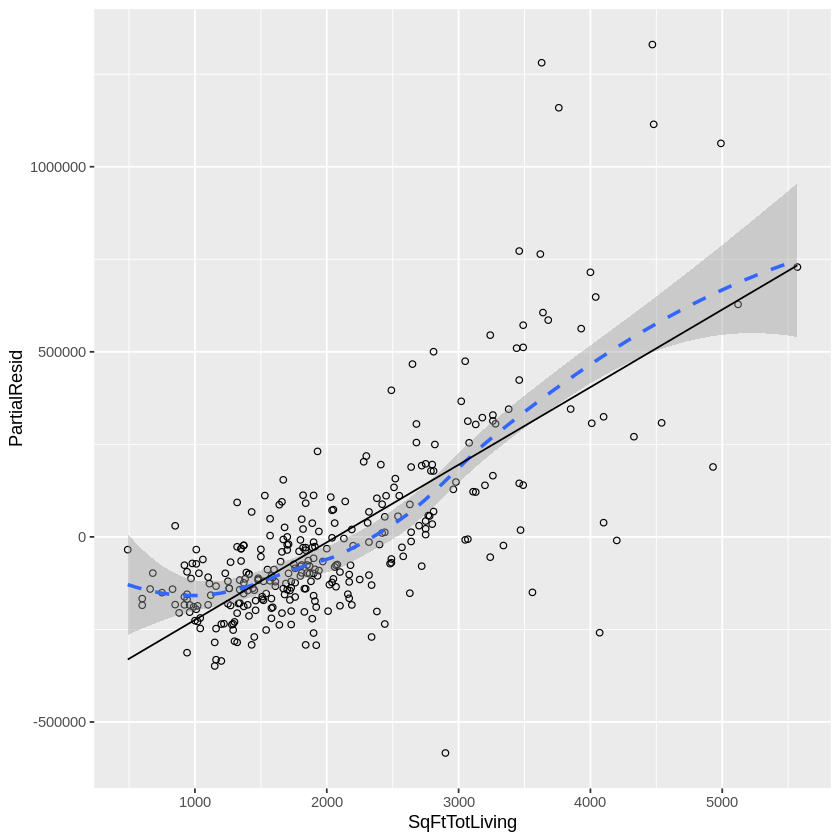

In [ ]:
# Plot the estimate of the contribution that SqFtTotLiving adds to the sales price.
df <- data.frame(SqFtTotLiving = house_98105[, 'SqFtTotLiving'],
                 Terms = terms[, 1],
                 PartialResid = partial_resid[, 1])
graph <- ggplot(df, aes(SqFtTotLiving, PartialResid)) +
  geom_point(shape=1) + scale_shape(solid = FALSE) +
  geom_smooth(linetype=2, formula=y~x, method='loess') + 
  geom_line(aes(SqFtTotLiving, Terms)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
graph

# NB:
# The relationship between the sales price and SqFtTotLiving is non linear
# (dashed line). The regression line (solid line) underestimates the sales price
# for homes less than $1,000$ square feet and oversetimates the price for homes
# between $2,000$ and $3,000$ square feet.
# There are too few points ovre $4,000$ to draw conclusions for those homes. 